一个非常简单的图模式 

In [1]:
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from tools_helper import model,display
from langgraph.graph import END, MessageGraph

In [2]:
# 建立图
graph=MessageGraph()

# 增加一个节点，节点的名称是oracle，节点的模型是model
graph.add_node("oracle", model)
# 增加一个边，从oracle到END
graph.add_edge("oracle", END)
# 设置 oracle 节点为开始节点
graph.set_entry_point("oracle")
# 编译图
runnable = graph.compile()

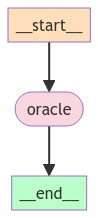

In [3]:
# 把图画出来
display(runnable)

In [4]:
# 图的运行，输入一个消息，然后到达END节点
runnable.invoke(HumanMessage("What is 1 + 1?"))

[HumanMessage(content='What is 1 + 1?', id='f4a3d893-8c20-4596-83be-120d03196744'),
 AIMessage(content='1 + 1 equals 2.', response_metadata={'model': 'qwen2', 'created_at': '2024-06-13T01:24:30.763338208Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 4633349361, 'load_duration': 4449750292, 'prompt_eval_count': 16, 'prompt_eval_duration': 85545000, 'eval_count': 9, 'eval_duration': 86355000}, id='run-f157a03a-686c-4aa5-a660-cf9b9b234582-0')]